<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset

In [ ]:
boston_df = boston_df.drop(columns=["Unnamed: 0"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Task 2: Generate descriptive statistics and visualizations

1. For the "Median value of owner-occupied homes" provide a boxplot.

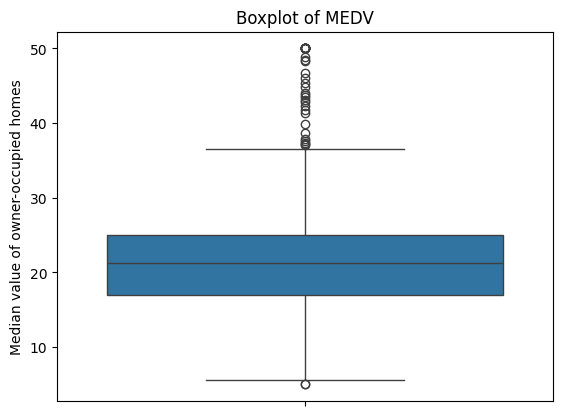

In [ ]:
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of MEDV')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

**Conclusion**: The boxplot indicates that the majority of owner-occupied homes have a median value concentrated around 21, with a significant number of outliers indicating higher median values.

2. Provide a bar plot for the Charles river variable

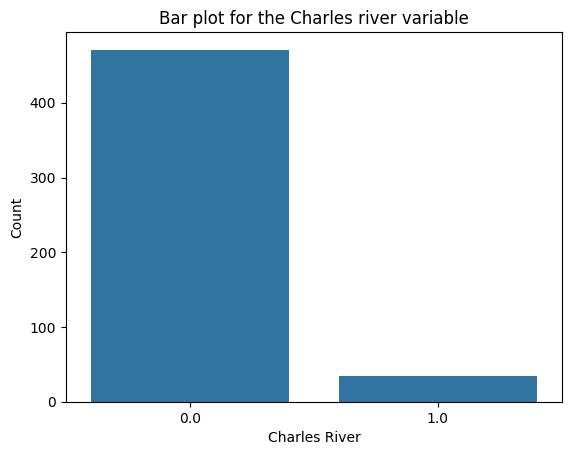

In [ ]:
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar plot for the Charles river variable')
plt.xlabel('Charles River')
plt.ylabel('Count')
plt.show()

**Conclusion**: The bar plot reveals a significant imbalance in the variable. This suggests that most of the properties in the dataset are not near the Charles River, and only a small proportion are bounded by it.

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [ ]:
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] > 70, 'age_group'] = '70 years and older'

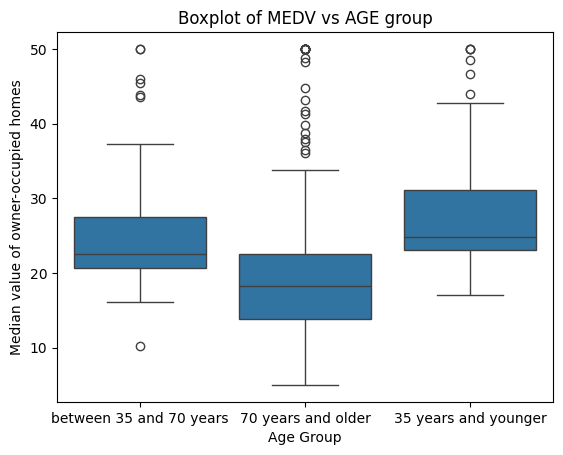

In [ ]:
sns.boxplot(x=boston_df['age_group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE group')
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

**Conclusion**: Younger properties (35 years and younger) tend to have higher median values compared to older properties. As properties age, their median values tend to decrease.
Also, all groups have outliers, but the "70 years and older" and "between 35 and 70 years" groups show more outliers on the higher end, which indicates that there are some older properties with significantly higher values.

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

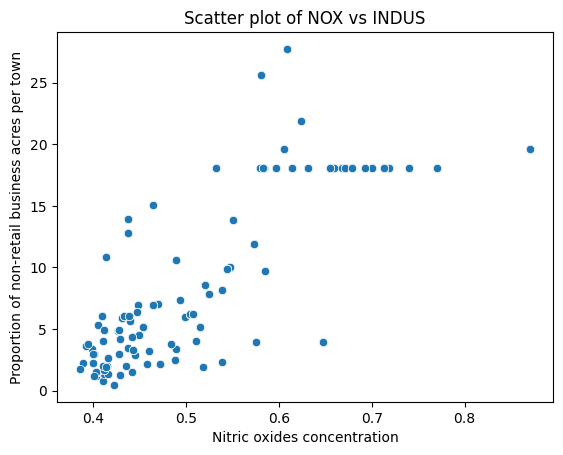

In [ ]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter plot of NOX vs INDUS')
plt.xlabel('Nitric oxides concentration')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

**Conclusion**: The scatter plot indicates that towns with higher proportions of non-retail business acres tend to have higher Nitric oxide concentrations. There appears to be a positive correlation between the variables. As the proportion of non-retail business acres per town increases, the Nitric oxide concentration also tends to increase.

5. Create a histogram for the pupil to teacher ratio variable

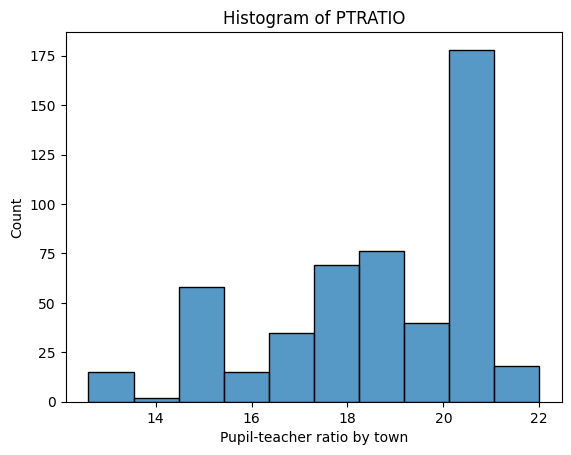

In [ ]:
sns.histplot(boston_df['PTRATIO'], bins=10)
plt.title('Histogram of PTRATIO')
plt.xlabel('Pupil-teacher ratio by town')
plt.show()

**Conclusion**: The distribution is right-skewed, indicating that most towns have a higher pupil-teacher ratio. The most common pupil-teacher ratio is around 18-21, with the highest frequency observed in this range.

### Task 3: Use the appropriate tests to answer the questions provided

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [ ]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

A p-value less than the typical significance level of 0.05 indicates that the variances are significantly different between the two groups.

In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: The p-value is smaller than 0.05, so we reject the null hypothesis, as there is enough proof that there is a statistically significant difference in the median value of houses based on whether they are bounded by the Charles River or not.

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [ ]:
# Create the age_group column
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'

# Perform Levene's test for equal variances
levene_stat, levene_p = scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                               boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                               boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                               center='mean')
print(f"Levene's Test Statistic: {levene_stat}, P-value: {levene_p}")
# since the p-value is greater than 0.05 we can assume equality of variance

Levene's Test Statistic: 2.7806200293748304, P-value: 0.06295337343259205


In [ ]:
# Separate the data into groups
age_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
age_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
age_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# Perform ANOVA
f_statistic, p_value = scipy.stats.f_oneway(age_35, age_35_70, age_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Since the p-value is less than 0.05, we will reject the null hypothesis, as there is significant evidence that at least one of the medians differ.

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [ ]:
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Correlation: {corr}, P-value: {p_value}')

Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98


**Conclusion**: Since the p-value is less than 0.05, we will reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. The correlation coefficient (r) of 0.7637 also indicates a strong positive relationship between the two variables.

4. What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes? (Regression analysis)

In [ ]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        20:41:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion**: The p-value of 1.21e-08  indicates that an additional weighted distance to the five Boston employment centers (DIS) has a statistically significant impact on the median value of owner-occupied homes (MEDV). However, the effect is relatively small as indicated by the low R-squared value of 0.062, suggesting that other variables may be more influential in determining home values.